# Middleware

Middleware is a framework of hooks into Djano's request/response processing.

It's a light, low-level "plugin" system for globally altering Django's input or output. Each middleware component is responsible for doing some specific function.

* Built in Middleware
* Custom Middleware

## How Middleware Works

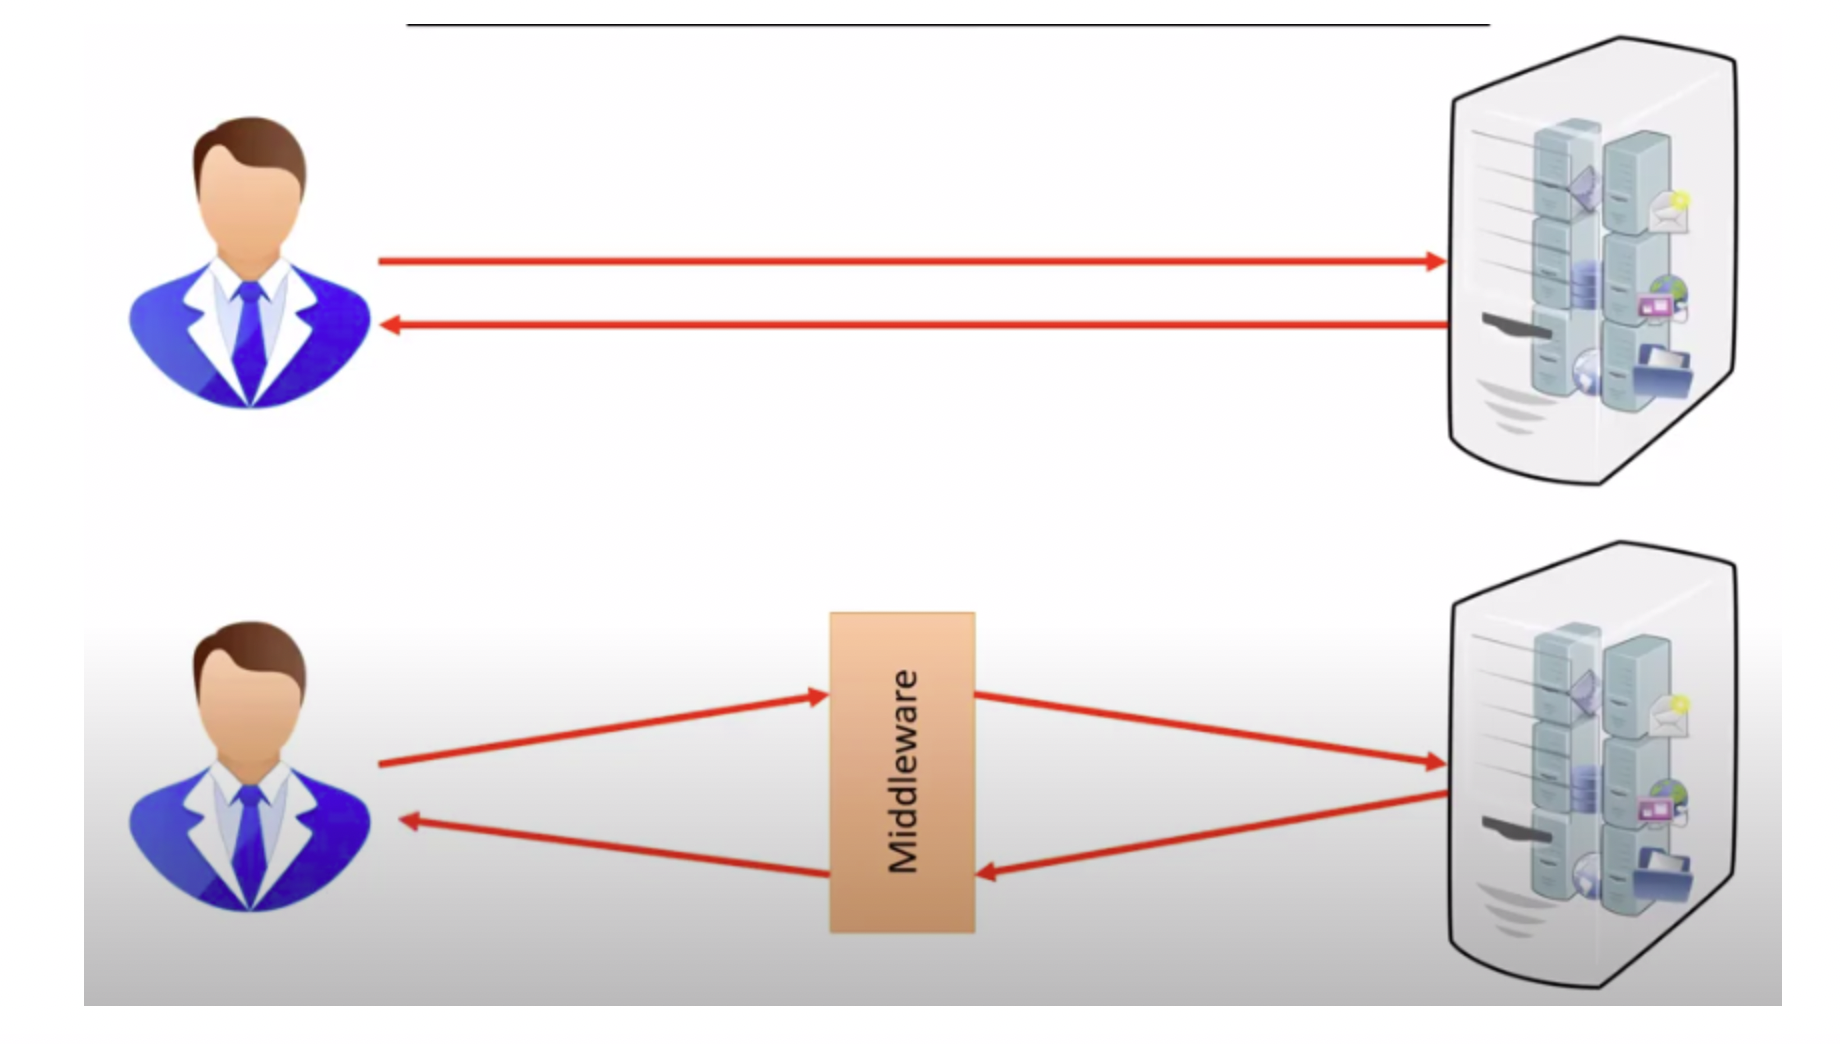

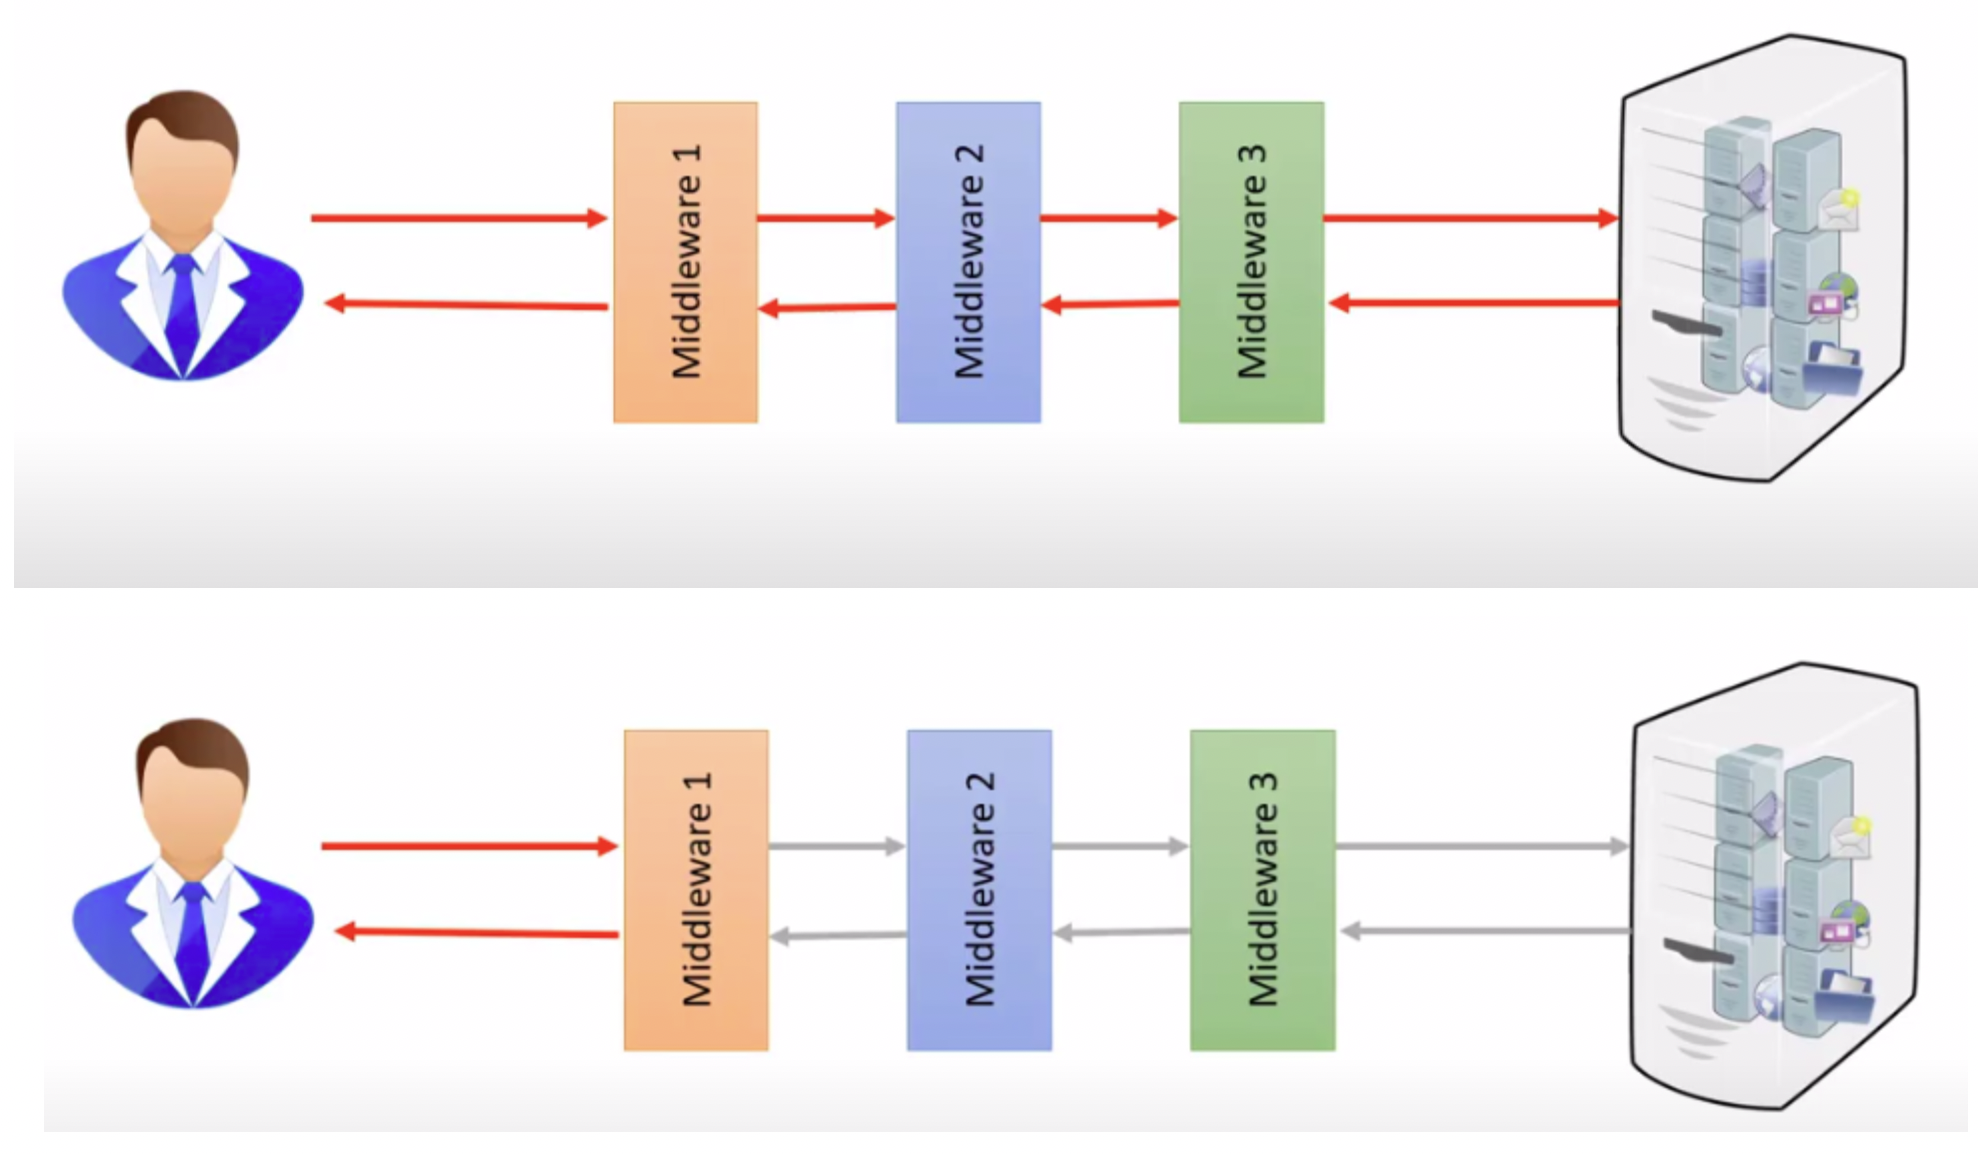

## Function based Middleware

A middleware factory is a callable that takes a get_response callable and returns a middleware.

A middleware is a callable that takes a request and returns a reponse, just like a view.


In [1]:
def my_middleware(get_reponse):
    # One-time configuration and initialization.
    def my_function(request):
        #code to be executed for each request before the view are called.
        response = get_response(request)
        # Code to be executed for each request/respone after the view is called.
        return respone
    return my_function

**get_response()**

The get_response callable provided bby Django might be the actual view (if this is the last listed middleware) or it might be the next middleware in the chain.

The current middleware doesn't need to know or care what exactly it is, just that it represents whatever comes next.

The get_response callable for the last middleware in the chain won't be the actual view but rather a wrapper method from the handler which takes care of applying view middleware, calling the view with appropriate URL arguments, and applying template-response and exception middleware.

Middleware can live anywhere on your Python path.

### Activating Middleware

To activate a middleware component, add it to the MIDDLEWARE list in your Django settings.

In MIDDLEWARE, each middleware component is respresented by a string: the full Python path to the middleware factory's class or function name. The order in MIDDLEWARE matters because a middleware can depend on other middleware. For instance, AuthenticationMiddleware stores the authenticated user in the session; therefore, it must run after SessionMiddleware.

**Eg:-**

    MIDDLEWARE = [
        'django.middleware.security.SecurityMiddleware',
        'django.middleware.sessions.middleware.SessionMiddleware',
        'blog.middlewares.my_middleware',
    ]
    
## Class Based Middleware    

In [3]:
class MyMiddleware:
    def __init__(self, get_response):
        self.get_respone = get_response
        # One-time configuration and initialization.
    
    def __call__(self, request):
        # Code to be executed for each request before the view (and later middleware) are called.
        response = self.get_response(request)
        # Code to be executed for each request/response after the view is called.
        return response

**_ _init__(get_response)**

_ _init__(get_response) - Middleware factories must accept a get_reponse argument. You can also initialize some global state for the middleware. Keep in mind a couple of caveats:

* Django initializes your middleware with only the get_response argument, so you can't define _ _init__() as requiring any other arguments.

* Unlike the _ _call__() method which is called once per request, _ _init__() is called only once, when the web server starts.

### Activating Middleware

To activate a middleware component, add it to the MIDDLEWARE list in your Django settings.

In MIDDLEWARE, each middleware component is respresented by a string: the full Python path to the middleware factory's class or function name. The order in MIDDLEWARE matters because a middleware can depend on other middleware. For instance, AuthenticationMiddleware stores the authenticated user in the session; therefore, it must run after SessionMiddleware.

**Eg:-**

    MIDDLEWARE = [
        'django.middleware.security.SecurityMiddleware',
        'django.middleware.sessions.middleware.SessionMiddleware',
        'blog.middlewares.MyMiddleware',
    ]
    
## Middleware Hooks

Following are special methods to class-based middleware:

process_view(request, view_func, view_args, view_kwargs) - It is called just before Django calls the view.

It should return either None or an HttpResponse object.

If it returns None, Django will continue processing this request, executing any other process_view() middleware and, then, the appropriate view.

If it returns an HttpResponse object, Django won't bother calling the appropriate view; it'll apply response middleware to that HttpResponse and return the result.

    where,
    request - It is an HttpRequest object.
    view_func - It is the Python function that Django is about to use. (It's the actual function object, not the name of the function as a string)
    view_args - It is a list of positional arguments that will be passed to the view.
    view_kwargs - It is a dictionary of keyword arguments that will be passed to the view.

Neither view_args nor view_kwargs include the first view argument (request).

process_exception(request, exception) - Django calls process_exception() when a view raises an exception.

It should return either None or an HttpRespone object.

If it returns an HttpResponse object, the template response middleware will be applied and the resulting response returned to the browser. Otherwise, default exception handling kicks in.

    where,
    request - It is an HttpRequest object.
    exception - It is an Exception object raised by the view function.
    
Note - Middleware are run in reverse order during the response phase, which includes process_exception. If an exception middleware returns a response, the process_exception methods of the middleware classes above that middleware won't be called at all.

process_template_response(request, response) - This method is called just after the view has finished executing, if the response instance has a render() method, indicating that it is a TemplateResponse or equivalent.

It must return a respone object that implements a render method.

It could alter the given response by changing response.template_name and respone.context_data, or it could create and retunr a brand-new TemplateResponse or equivalent.

You don't need to explicitly render responses, response will be automatically rendered once all template response middleware has been called.

    where,
    
    request - It is an HttpRequest object.
    respone - It is the TemplateResponse object (or equivalent) returned by a Django view or by a middleware.
    
Note - Middleware are run in reverse order during the response phase, which includes process_template_response().

### TemplateResponse

TemplateResponse - TemplateResponse is a subclass of SimpleTemplateResponse that knows about the current HttpRequest.

A TemplateResponse object can be used anywhere that a normal django.http.HttpResponse can be used. It can also be used as an alternative to calling render().

**Method**

_ _init__(request, template, context=None, content_type=None, status=None, charset=None, using=None) - It instantiates a TemplateResponse object with the given request, template, context, content type, HTTP status, and charset.

    where,
    request - An HttpRequest instance.
    
    template - A backen-dependent template object (such as those returned by get_template()), the name of a template, or a list of template names.
    
    context - A dict of values to add to the template context. By default, this is an empty dictionary.

    context_type - The value included in the HTTP Content-Type header, including the MIME type specification and the character set encoding. If content_type is specified, then its value is used. Otherwise, 'text/html' is used.

    status - The HTTP status code for the response.
    
    charset - The charset in which the response will be encoded. If not given it will be extracted from content_type, and if that is unsuccessful, the DEFAULT_CHARSET setting will be used.
    
    using - The NAME of a template engine to use for loading the template.
    
There are three circumstances under which a TemplateResponse will be rendered:

When the TemplateResponse instance is explicitly rendered, using the SimpleTemplateResponse.render() method.

When the content of the response is explicitly set by assigning response.content.

After passing through template response middleware, but before passing through response middleware.

Note:- 
    
    A TemplateResponse can only be rendered once.
    
## Built-in Middleware

* SecurityMiddleware - The django.middleware.security.SecurityMiddleware provides several security enhancements to the request/response cycle.

Each one can be independently enabled or disabled with a setting.

    SECURE_BROWSER_XSS_FILTER
    SECURE_CONTENT_TYPE_NOSNIFF
    SECURE_HSTS_INCLUDE_SUBDOMAINS
    SECURE_HSTS_PRELOAD
    SECURE_HSTS_SECONDS
    SECURE_REDIRECT_EXEMPT
    SECURE_REFERRER_POLICY
    SECURE_SSL_HOST
    SECURE_SSL_REDIRECT
    
> SECURE_BROWSER_XSS_FILTER - If True, the SecurityMiddleware sets the X-XSS-Protection:1; mode=block header on all responses that do not already have it.

    Modern browsers don't honor X-XSS-Protection HTTP header anymore. Although the setting offers little practical benefit, you may still want to set the header if you support older browsers. Default is False.
    
> SECURE_CONTENT_TYPE_NOSNIFF - If True, SecurityMiddleware sets the X-Content-Type-Options: nosniff header on all responses that do not already have it. Default is True.

> SECURE_HSTS_INCLUDE_SUBDOMAINS - If True, the securityMiddleware adds the includeSubDomains directive to the HTTP Strict Transport Security header. It has no effect unless SECURE_HSTS_SECONDS is set to a non-zero value. Default is False.


> SECURE_HSTS_PRELOAD - If True, the SecurityMiddleware adds the preload directive to the HTTP Strict Transport Security header. It has no effect unless SECURE_HSTS_SECONDS is set to a non-zero value. Default is False.

> SECURE_HSTS_SECONDS - If set to a non-zero integer value, the SecurityMiddleware sets the HTTP Strict Transport Security header on all responses that do not already have it. Default is 0

> SECURE_REDIRECT_EXEMPT - If a URL path matches a regular expression in this list, the request will not be redirected to HTTPS. The SecurityMiddleware strips leading slashes from URL paths, so pattern shouldn't include them, eg.  

        SECURE_REDIRECT_EXEMPT =[r^no-ssl/$', ...].

> SECURE_REFERRER_POLICY - If configured, the SecurityMiddleware sets the Referrer Policy header on all responses that do not already have it to the value provided. Default is None.

> SECURE_SSL_HOST - If a string (e.g. secure.example.com), all SS: redirects will be directed to this host rather than the originally-requested host (eg. www.example.com). If SECURE_SSL_REDIRECT is False, this setting has no effect. Default is None.

> SECURE_SSL_REDIRECT - If True, the SecurityMiddleware redirects all non-HTTPS requests to HTTPS (except for those URLs matching a regular expression listed in SECURE_REDIRECT_EXEMPT). Default is False.

* CommonnMiddleware - Adds a few conveniences for perfectionists:

Forbids access to user agents in the DISALLOWED_USER_AGENTS setting, which should be a list of compiled regular expression objects.

Performs URL rewriting based on the APPEND_SLASH and PREPEND_WWW settings.

If APPEND_SLASH is True and the initial URL doesn't end with a slash, and it is not found in the URLconf, then a new URL is formed by appending a slash at the end. If this new URL is found in the URLconf, then Django redirects the request to this new URL. Otherwise, the initial URL is processed as usual.

For example, google.com/home will be redirected to google.com/home/ if you don't have a valid URL pattern for google.com/home but do have a valid pattern for google.com/home/.

If PREPEND_WWW is True, URLs that lack a leading "www." will be redirected to the same URL with a leading "www".

Both of these options are meant to normalize URLs. The philosophy is that each URL should exist in one, and only one, place. Technically a URL google.com/home is distinct from google.com/home/ a search-engine indexer would treat them as separate URLs - so it's best practice to normalize URLs.

* UpdateCacheMiddleware and FetchFromCacheMiddleware - These middleware belongs to cache middleware. It enables the site-wide cache. If these are enabled, each Django-powered page will be cached for as long as the CACHE_MIDDLEWARE_SECONDS settings defines.

* MessageMiddleware - Enables cookie-and session-based message support.

* SessionMiddleware - Enables session support.

* AuthenticationMiddleware - It adds the user attribute, representing the currently-logged-in user, to every incoming HttpRequest object.

* CsrfViewMiddleware - It adds protection against Cross Site Request Forgeries by adding hidden form fields to POST forms and checking requests for the correct value.

* XFrameOptionsMiddleware - Simple clickjacking protection via the X-Frame-Options header.

* FlatPageFallBackMiddleware - Should be near the bottom as it's a last-resort type of middleware.

* RedirectFallBackMiddleware - Should be near the bottom as it's a last-resort type of middleware.

* LocaleMiddleware - One of the topmost, after SessionMiddleware (uses session data) and UpdateCacheMiddleware (modifies Vary header).

* ConditionalGetMiddleware - Before any middleware that may change the response (it sets the ETag header). After GZipMiddleware so it won't calculate an ETag headeron gzipped contents.

* GZipMiddleware - Before any middleware that may change or use the response body. After UpdateCacheMiddleware: Modifies Vary header.    